# Example 01: MNIST Demo

## (i) Import libraries

In [1]:
import sys
sys.path.append('../')
import matplotlib
import matplotlib.pyplot as plt
import visualization

## (ii) Plot classification accuracy
The dotted lines correspond to the epoch number at which the refinement phase started. 

['/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/mnist/mbv2tiny/run0_width_0.5_expand_4/checkpoints/records.pkl']
['/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/mnist/mbv2tiny/run0_width_0.5_expand_4/checkpoints/model.pth']


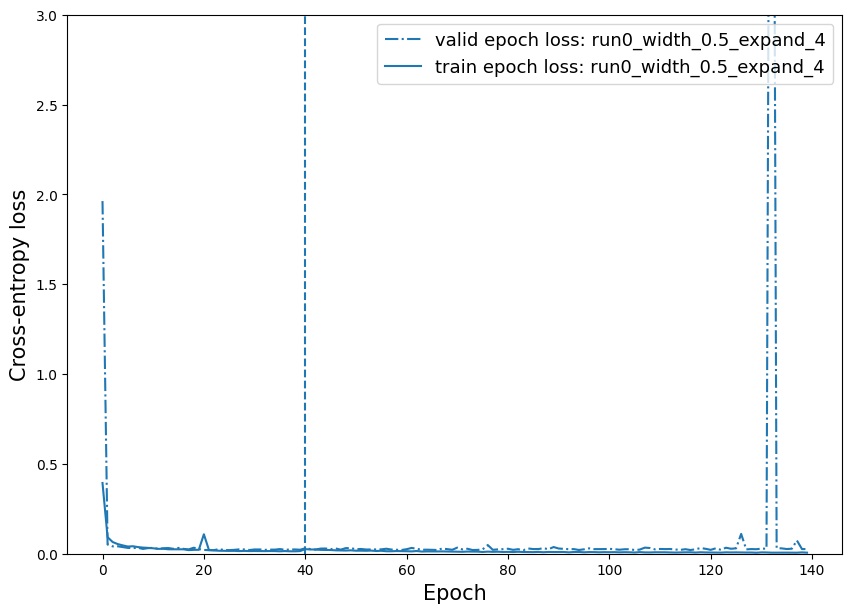

run0_width_0.5_expand_4: test accuracy = 99.48999786376953


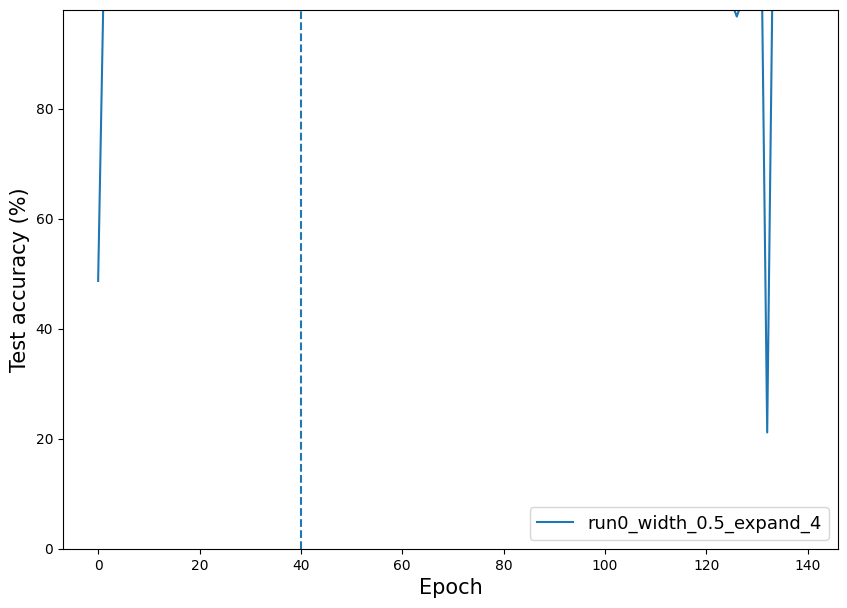

In [3]:
%matplotlib inline

# exp_dir = '/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/mnist/mbv2light/'
# exp_dir = "/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/mnist/mbv2/"
# exp_dir = "/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/mnist/mbv2light//"
exp_dir = "/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/mnist/mbv2tiny/"
# models_list = ["run0","run1_width_0.5","run1_width_1.0"]
# models_list = ["run1_width_0.2"]
models_list = ["run0_width_0.5_expand_4"]
records_file_list = [exp_dir + model_name + '/checkpoints/records.pkl' for model_name in models_list]
model_files = [exp_dir + model_name + '/checkpoints/model.pth' for model_name in models_list]

print(records_file_list)
print(model_files)

visualization.plot_performance(records_file_list, models_list, ymax = 3.0, figsize=(10,7), finetune_position=True)
visualization.plot_accuracy(records_file_list, models_list, figsize=(10,7), ymin=0, ymax=98, finetune_position=True)

## (iii) Compute model size

In [4]:
_ = visualization.compute_number_of_params(model_files, models_list, is_gpu=False)


Model: run0_width_0.5_expand_4
Number of parameters summary:
    Total: 139352 
    Max per branch: 135611 
    Min per branch: 135611 
    Average per branch: 135611.0


## (iv) Visualise the tree structure

     Plotting:  hist_split_node_002.png


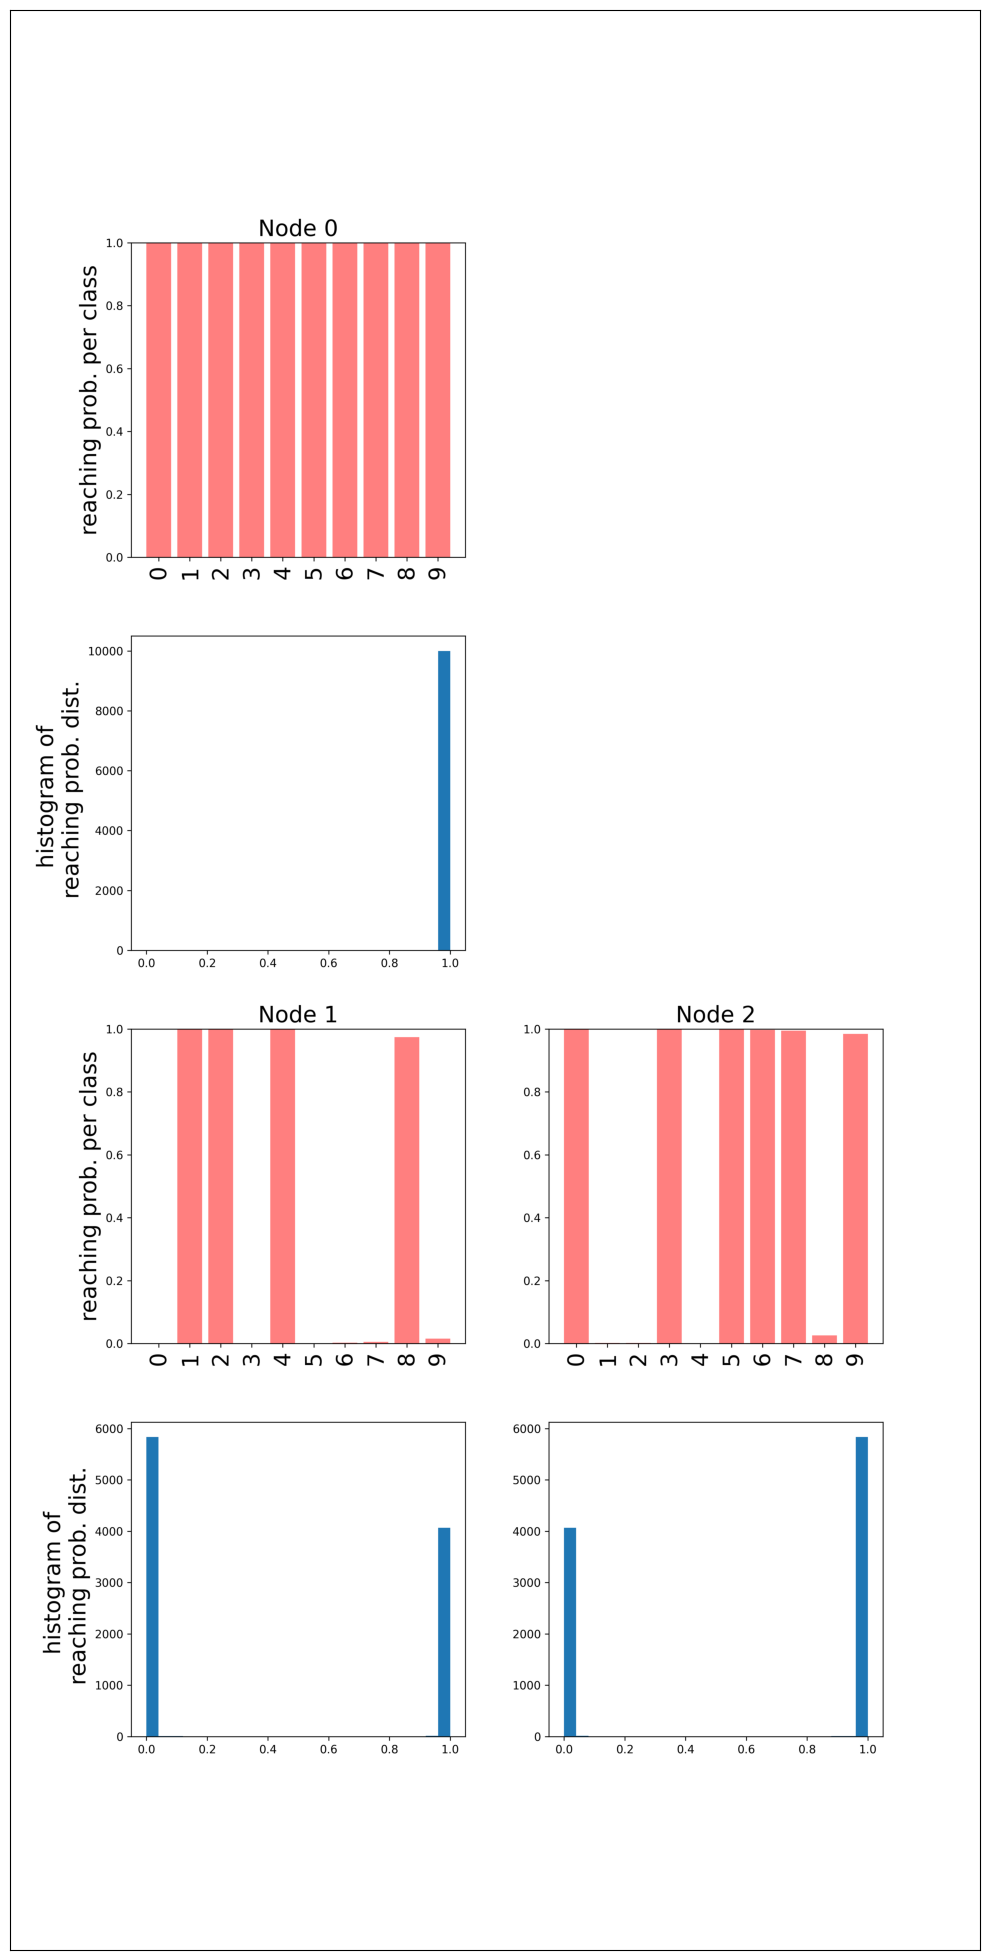

In [5]:
fig_dir = exp_dir + 'run0' + '/figures/'
visualization.visualize_treestructures(fig_dir, figsize=(10,20))

# FLOPs and model size with ptflops

In [6]:
from models import Tree
from utils import load_tree_model
import ptflops

# model_path = "/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/mnist/mbv2light/run0/checkpoints/model.pth"
# model_path = "/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/mnist/mbv2light/run1_width_0.2/checkpoints/model.pth"

# model_path = "/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/mnist/mbv2light/run1_width_0.5/checkpoints/model.pth"
model_path = "/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/experiments/mnist/mbv2tiny/run0_width_0.5_expand_4/checkpoints/model.pth"

model = load_tree_model(model_path)


inputres = (1,28,28)
flops, params = ptflops.get_model_complexity_info(model, inputres, as_strings=True, print_per_layer_stat=True)
print('Flops:  ' + flops)
print('Params: ' + params)

prob before: tensor(nan, grad_fn=<MulBackward0>)
prob after: tensor([nan], grad_fn=<UnsqueezeBackward0>)
prob before: tensor(nan, grad_fn=<MulBackward0>)
prob after: tensor([nan], grad_fn=<UnsqueezeBackward0>)
Tree(
  246.78 k, 100.000% Params, 7.6 MMac, 100.000% MACs, 
  (tree_modules): ModuleList(
    246.78 k, 100.000% Params, 7.6 MMac, 100.000% MACs, 
    (0): Sequential(
      135.61 k, 54.952% Params, 7.6 MMac, 99.902% MACs, 
      (transform): Root_MBV2tiny(
        80.03 k, 32.429% Params, 7.49 MMac, 98.538% MACs, 
        (features): Sequential(
          80.03 k, 32.429% Params, 7.49 MMac, 98.538% MACs, 
          (0): InvertedResidual(
            59, 0.024% Params, 94.08 KMac, 1.237% MACs, 
            (conv): Sequential(
              59, 0.024% Params, 94.08 KMac, 1.237% MACs, 
              (0): Conv2d(9, 0.004% Params, 14.11 KMac, 0.186% MACs, 1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (1): BatchNorm2d(2, 0.001% Params, 3.14 KMac,

/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/examples/../models.py:1810: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


prob before: tensor(nan, grad_fn=<MulBackward0>)
prob after: tensor([nan], grad_fn=<UnsqueezeBackward0>)
prob before: tensor(nan, grad_fn=<MulBackward0>)
prob after: tensor([nan], grad_fn=<UnsqueezeBackward0>)
Tree(
  59.33 k, 100.000% Params, 11.6 MMac, 100.000% MACs, 
  (tree_modules): ModuleList(
    59.33 k, 100.000% Params, 11.6 MMac, 100.000% MACs, 
    (0): Sequential(
      51.84 k, 87.388% Params, 11.59 MMac, 99.935% MACs, 
      (transform): Root_MBV2light(
        0, 0.000% Params, 11.49 MMac, 99.042% MACs, 
        (features): Sequential(
          0, 0.000% Params, 11.49 MMac, 99.042% MACs, 
          (0): InvertedResidual(
            0, 0.000% Params, 94.08 KMac, 0.811% MACs, 
            (conv): Sequential(
              0, 0.000% Params, 94.08 KMac, 0.811% MACs, 
              (0): Conv2d(0, 0.000% Params, 14.11 KMac, 0.122% MACs, 1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (1): BatchNorm2d(0, 0.000% Params, 3.14 KMac, 0.027% MACs

/home/hongyu/Projects/SubspaceLearningMachine_SoftTree/examples/../models.py:1743: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
